# Twitter COVID-19 time series combination and analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
from wordcloud import WordCloud 
%matplotlib inline

# Take a look at the tweetInfo dataset

In [4]:
tweet_dat = pd.read_csv('tweetInfo.csv', index_col=0, encoding = 'utf-8-sig')
print(tweet_dat.shape)
tweet_dat.head()

(51941, 9)


,month,day,hour,author,text,lang,place,favorite_cnt,retweet_cnt
index,,,,,,,,,
1219749116592508928,1,21,22,NFIDvaccines,#Pregnant? Learn tips for having a healthy pre...,en,NaN,2,1
1219765213622231040,1,21,23,WWG1WGA_WW,Correction: According to the CDC the virus tha...,en,NaN,15,7
1219689720474742795,1,22,0,BluesBrother91,The US Centers for Disease Control and Prevent...,en,NaN,33,44
1219694371995639808,1,22,1,AnnCoulter,Oh for pete's sake! The Supreme Court upheld ...,en,NaN,1506,407
1219808589918932993,1,22,2,TheOriginalBoto,@Firstname_Joel One of the press pack asked if...,en,NaN,1,0


## Distributions

In [5]:
author_group = tweet_dat.groupby(['author'])
popular_authors = author_group.agg({'favorite_cnt':'sum', 'retweet_cnt':'sum'})
popular_authors['tweets_cnt'] = author_group.size()

In [6]:
# most active authors in COVID-19
popular_authors.sort_values(['tweets_cnt'], ascending = False).head(10)

,favorite_cnt,retweet_cnt,tweets_cnt
author,,,
spectatorindex,1011949,438353,203
BNODesk,236769,142470,197
Reuters,36498,30705,150
CNN,302080,108309,148
WHO,358176,277415,125
Conflits_FR,113711,66077,105
business,46334,35177,103
DrDenaGrayson,170613,108465,98
OH_mes2,1296498,589885,93


In [7]:
# most popular authors in COVID-19
popular_authors.sort_values(['retweet_cnt','favorite_cnt'], ascending = False).head(10)

,favorite_cnt,retweet_cnt,tweets_cnt
author,,,
realDonaldTrump,6200415,1365169,56
_SJPeace_,1308088,682529,8
charliekirk11,1420084,590112,45
OH_mes2,1296498,589885,93
BarackObama,2113187,519460,4
tedlieu,1410695,506776,80
washikirei,38213,466031,62
spectatorindex,1011949,438353,203
RealJamesWoods,1223612,433870,46


Index(['United States', 'United Kingdom', 'Brasil', 'España',
       'Republika ng Pilipinas', 'भारत', 'ประเทศไทย', 'Indonesia', 'Malaysia',
       'France'],
      dtype='object')


D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\l

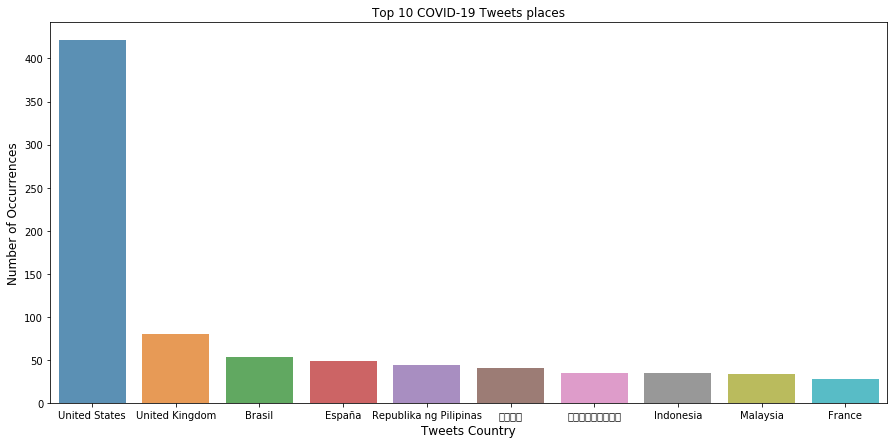

In [8]:
# places
place_cnts = tweet_dat['place'].value_counts()[:10]
print(place_cnts.index)
plt.figure(figsize=(15,7))
sns.barplot(place_cnts.index, place_cnts.values, alpha=0.8)
plt.title('Top 10 COVID-19 Tweets places')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tweets Country', fontsize=12)
#plt.xticks(rotation=45, ha="right")
plt.show()

Index(['en', 'es', 'fr', 'in', 'pt', 'und', 'it', 'ja', 'th', 'tr'], dtype='object')


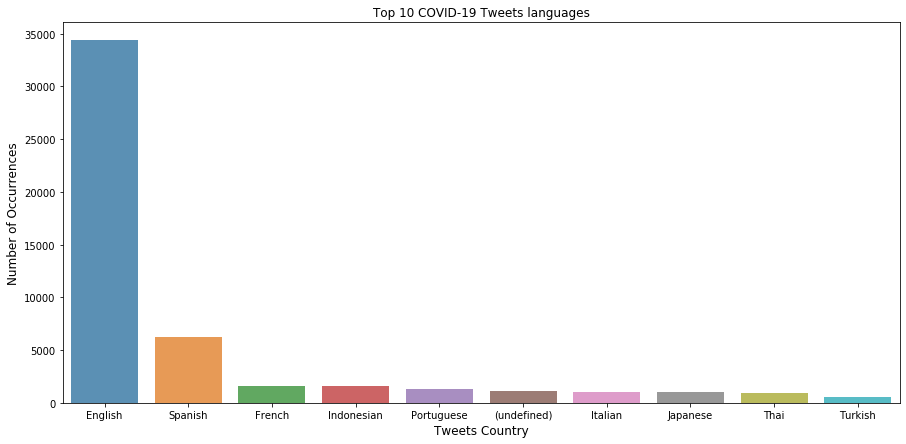

In [9]:
# languages
lang_cnts = tweet_dat['lang'].value_counts()[:10]
d = {'en':'English', 'es':'Spanish', 'in':'Indonesian', 'fr':'French', 'th':'Thai', 'pt':'Portuguese', 'und':'(undefined)', 'ja':'Japanese', 'it':'Italian', 'tr':'Turkish'}
print(lang_cnts.index)
plt.figure(figsize=(15,7))
names = [d[l] for l in lang_cnts.index]
sns.barplot(names, lang_cnts.values, alpha=0.8)
plt.title('Top 10 COVID-19 Tweets languages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tweets Country', fontsize=12)
plt.show()

## Preprocessing Text and Visualization

In [11]:
# preprocess text
from tqdm import tqdm
from preprocess_text.preprocess import preprocessing

if 'preprocess_text' not in tweet_dat.columns:
    preprocess_text = []
    for text in tqdm(tweet_dat['text']):
        t = preprocessing(text)
        preprocess_text.append(' '.join(t))
    tweet_dat['preprocess_text'] = preprocess_text
    tweet_dat.to_csv('tweetInfo.csv', index = False, encoding = 'utf-8-sig')
    display(tweet_dat.head())


100%|██████████| 51941/51941 [02:01<00:00, 427.30it/s]


In [18]:
#tweet_dat.drop('preprocess_text', axis=1, inplace=True)
display(tweet_dat.head())
print(tweet_dat['text'].values[:20])
tweet_dat['preprocess_text'].values[:20]

,month,day,hour,author,text,lang,place,favorite_cnt,retweet_cnt,preprocess_text
index,,,,,,,,,,
1219749116592508928,1,21,22,NFIDvaccines,#Pregnant? Learn tips for having a healthy pre...,en,NaN,2,1,#Pregnant learn tips healthy pregnancy giving ...
1219765213622231040,1,21,23,WWG1WGA_WW,Correction: According to the CDC the virus tha...,en,NaN,15,7,correction according cdc virus causes severe a...
1219689720474742795,1,22,0,BluesBrother91,The US Centers for Disease Control and Prevent...,en,NaN,33,44,us centers disease control prevention expected...
1219694371995639808,1,22,1,AnnCoulter,Oh for pete's sake! The Supreme Court upheld ...,en,NaN,1506,407,oh petes sake supreme court upheld muslim ban ...
1219808589918932993,1,22,2,TheOriginalBoto,@Firstname_Joel One of the press pack asked if...,en,NaN,1,0,one press pack asked patient transited made st...


['#Pregnant? Learn tips for having a healthy pregnancy and giving your baby a healthy start in life:… https://t.co/9Tp2x4meIK'
 'Correction: According to the CDC the virus that causes Severe Acute Respiratory Syndrome (SARS) might be a "previou… https://t.co/wXuBYEMbWP'
 'The US Centers for Disease Control and Prevention is expected to announce this afternoon that the first case of Wuh… https://t.co/fpF4672hH3'
 "Oh for pete's sake!  The Supreme Court upheld your Muslim ban, @realDonaldTrump!  Would you please put a temporary… https://t.co/xpCSMNra2o"
 '@Firstname_Joel One of the press pack asked if the patient had transited or made a stop-over at another airport en… https://t.co/dTXljeR0a1'
 'Do disinfectants kill the coronavirus?\nYes, they can. The CDC suggests that anyone exposed to an infected patient c… https://t.co/8pvchTR7vA'
 '#hcmktg #QuantiHealth Top story: First Wuhan Coronavirus Patient Identified in the United States… https://t.co/QLsrfYFQx0'
 'The United States has its f

array(['#Pregnant learn tips healthy pregnancy giving baby healthy start life',
       'correction according cdc virus causes severe acute respiratory syndrome sars might previou',
       'us centers disease control prevention expected announce afternoon first case wuh',
       'oh petes sake supreme court upheld muslim ban would please put temporary',
       'one press pack asked patient transited made stopover another airport en',
       'disinfectants kill coronavirus yes cdc suggests anyone exposed infected patient c',
       '#hcmktg #QuantiHealth top story first wuhan coronavirus patient identified united states',
       'united states first confirmed case new virus appeared wuhan china last month coron',
       'talking cdc stated vaccines one visit fine 🙄',
       'washington gov jay inslee first confirmed case coronavirus reported us risk low residents',
       'chinas contagious killer virus comes us american man hiss hospitalized washington state',
       '#BREAKING local me

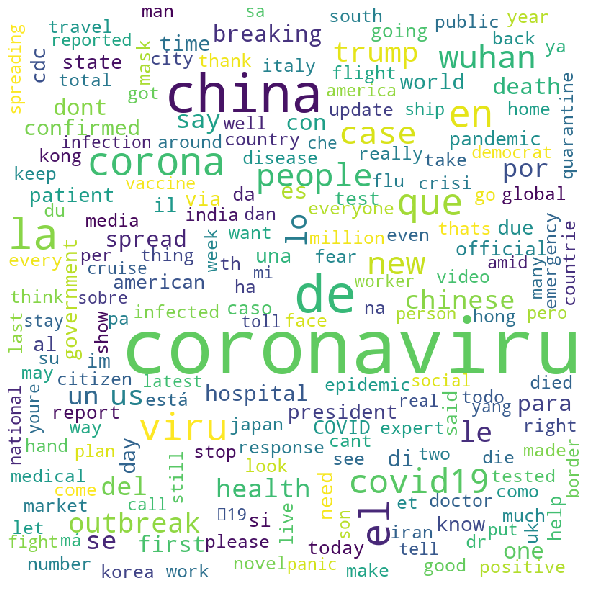

In [14]:
words = ' '.join(tweet_dat['preprocess_text'])
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10, collocations=False).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig("word_cloud.jpeg", dpi=300)
plt.show()